# 读取数据，去重

In [15]:
import pandas as pd
import os
cityShort = 'SH'
city_map = {'BJ':'Bei Jing', 'SH': 'Shang Hai'}
dir_map = {'BJ':'chengjiao', 'SH':'chengjiaoSH'}
city = city_map[cityShort]

dfs = []
for root, dirs, files in os.walk(dir_map[cityShort]):
    #print(root, files, dirs)
    files.sort()
    for f in files:
        print(root, f)
        dfs.append(pd.read_excel(os.path.join(root, f)))
df = pd.concat(dfs)
df = df.drop_duplicates(subset=['链家编号'])
df = df.loc[df['成交价(元/平)']> 1000]
len(df)

chengjiaoSH chengjiao-2019-07-14-310000.xls


2900

# 计算全市日均价与成交量序列

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


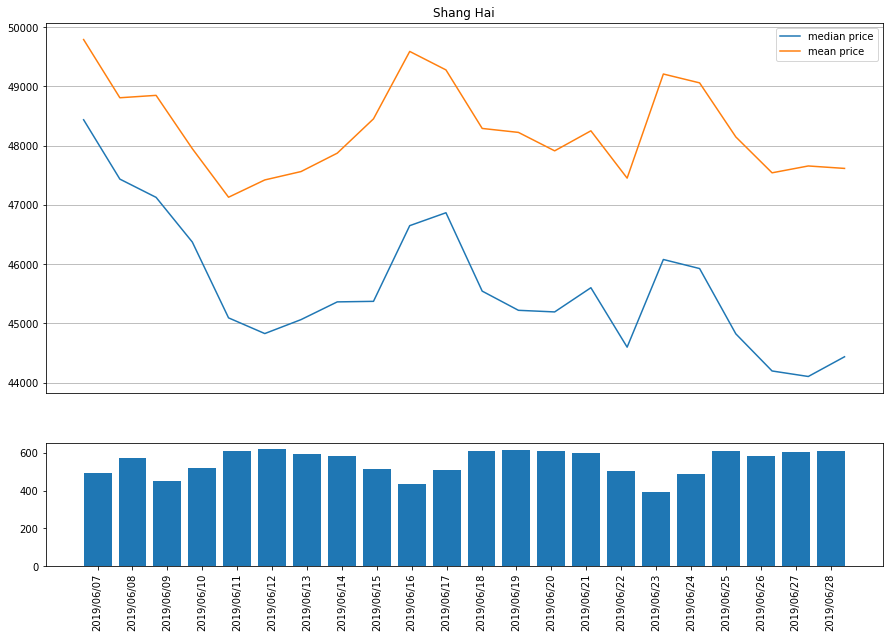

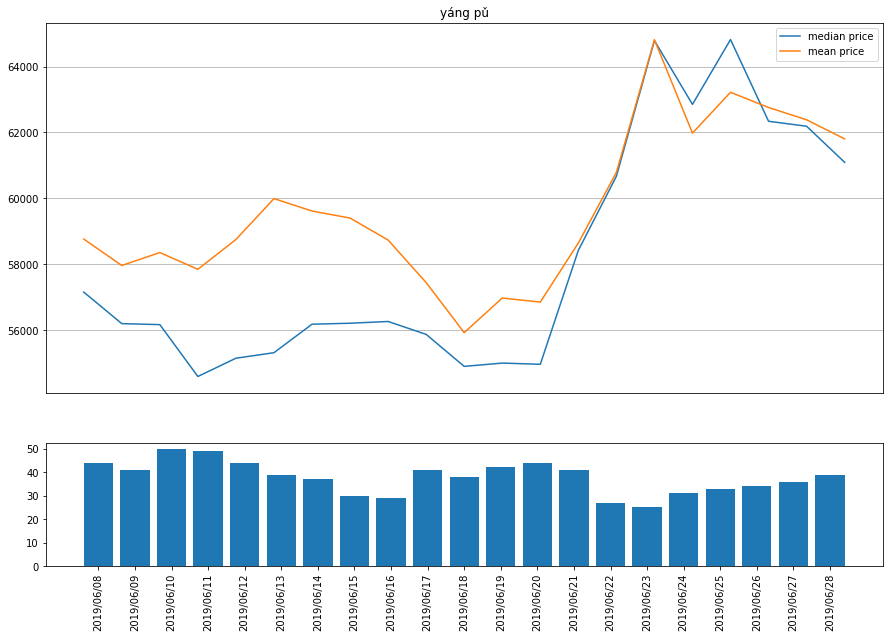

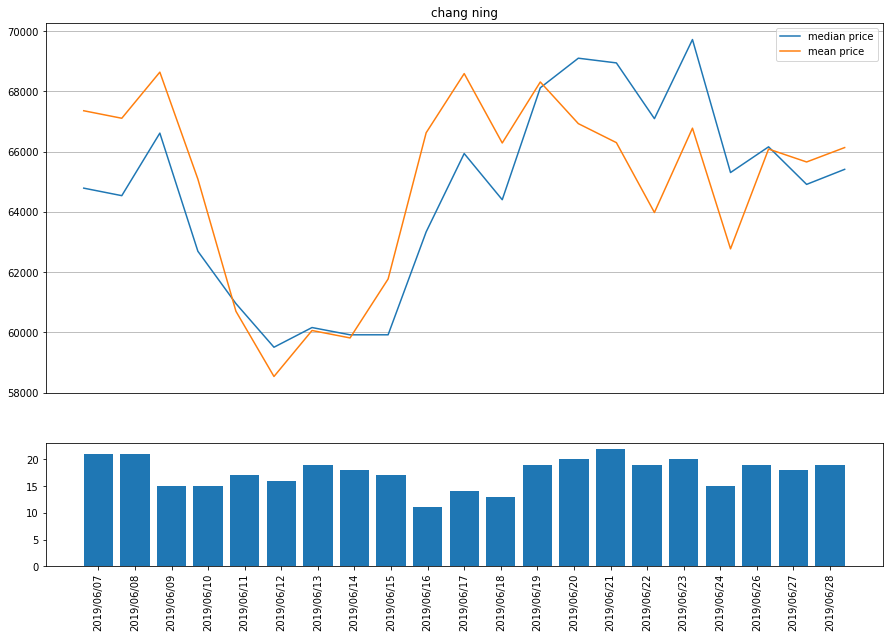

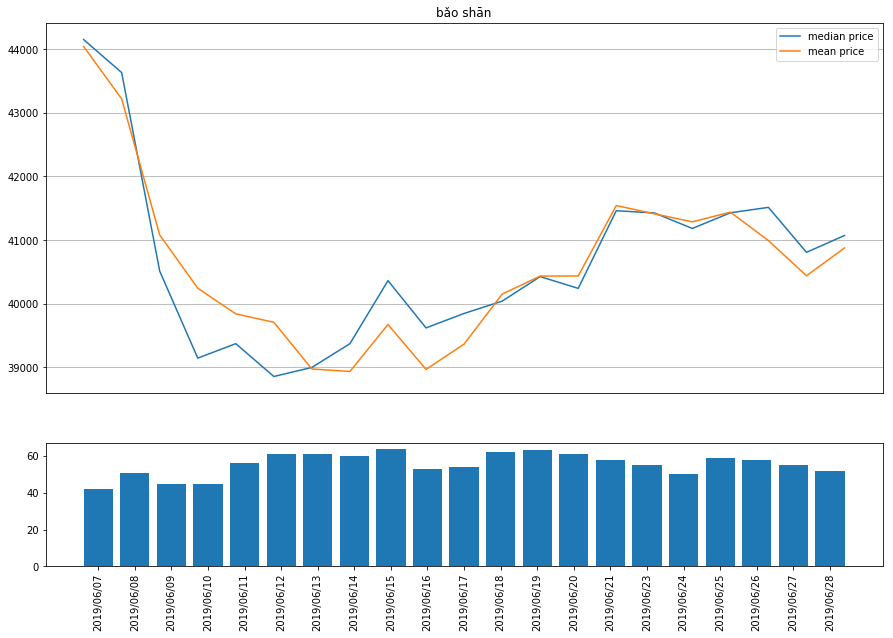

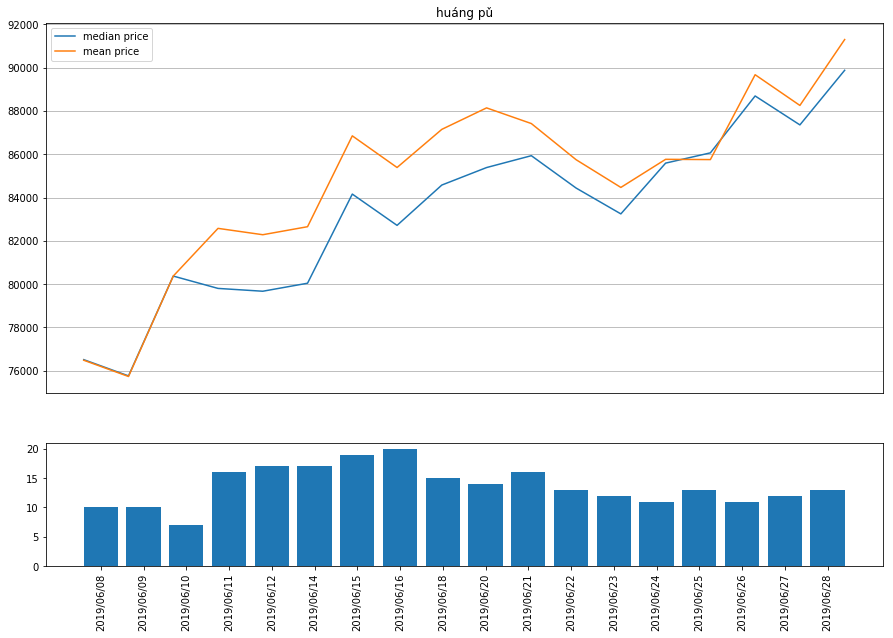

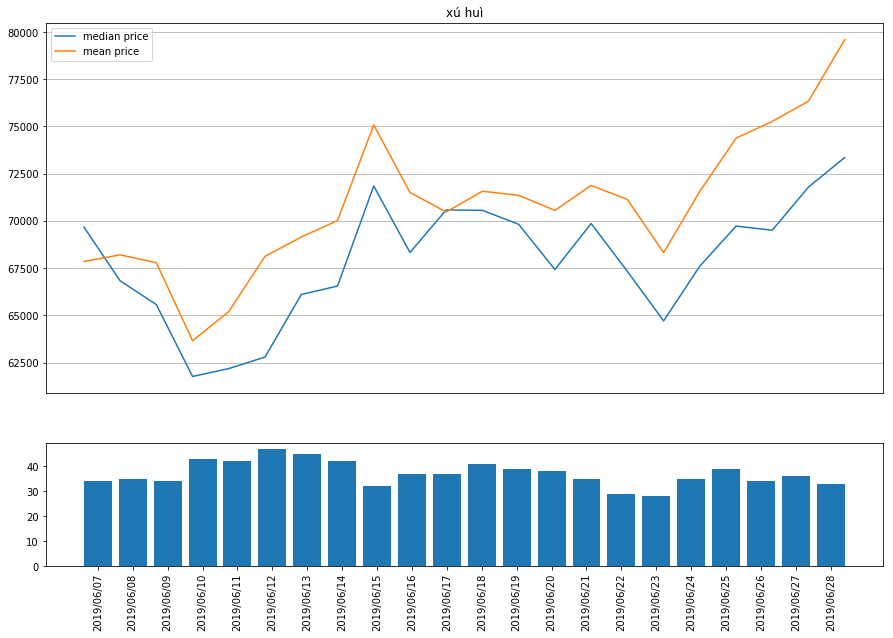

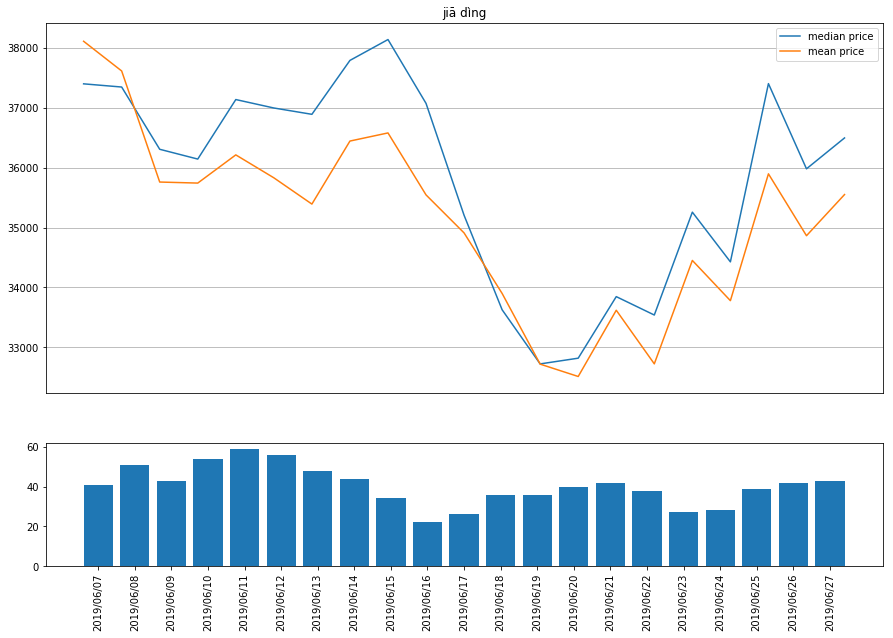

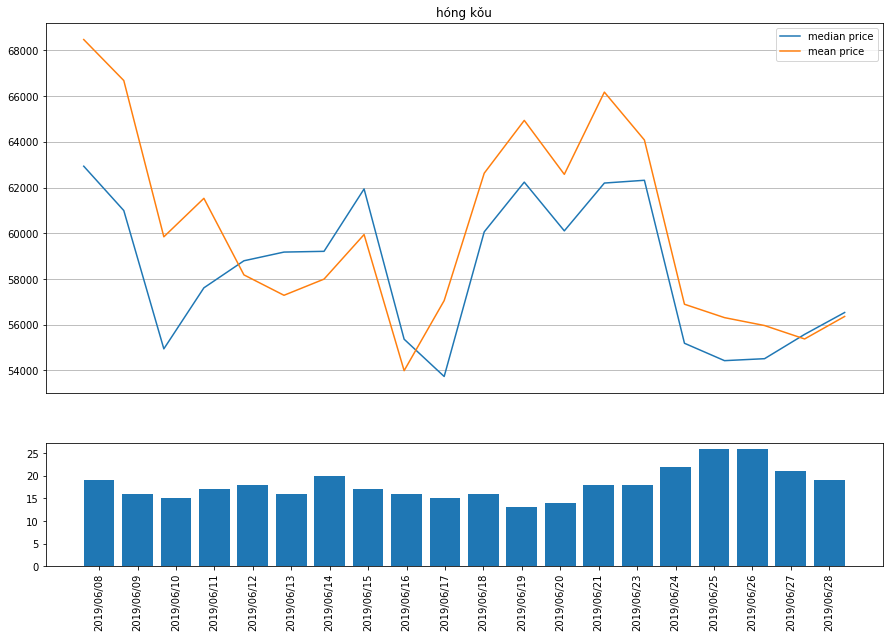

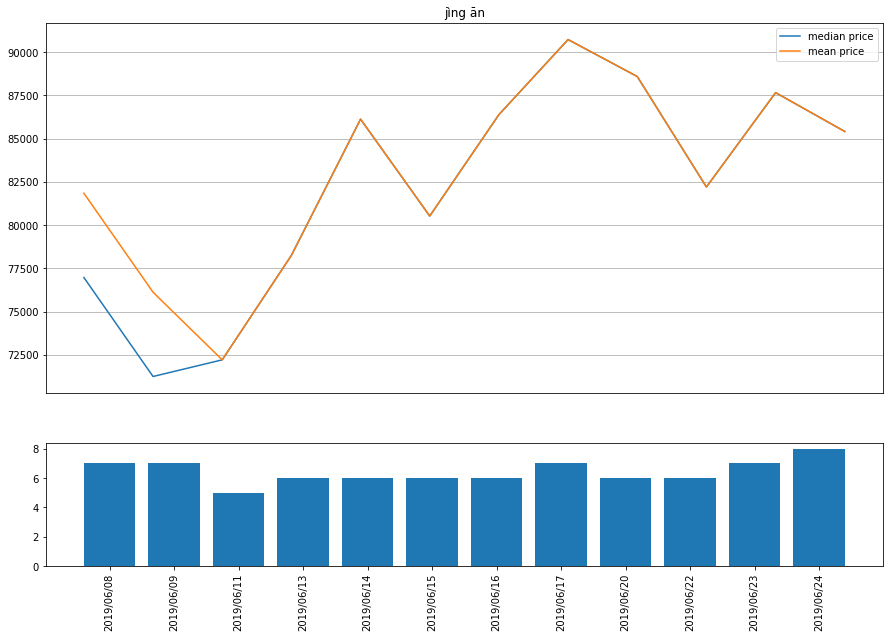

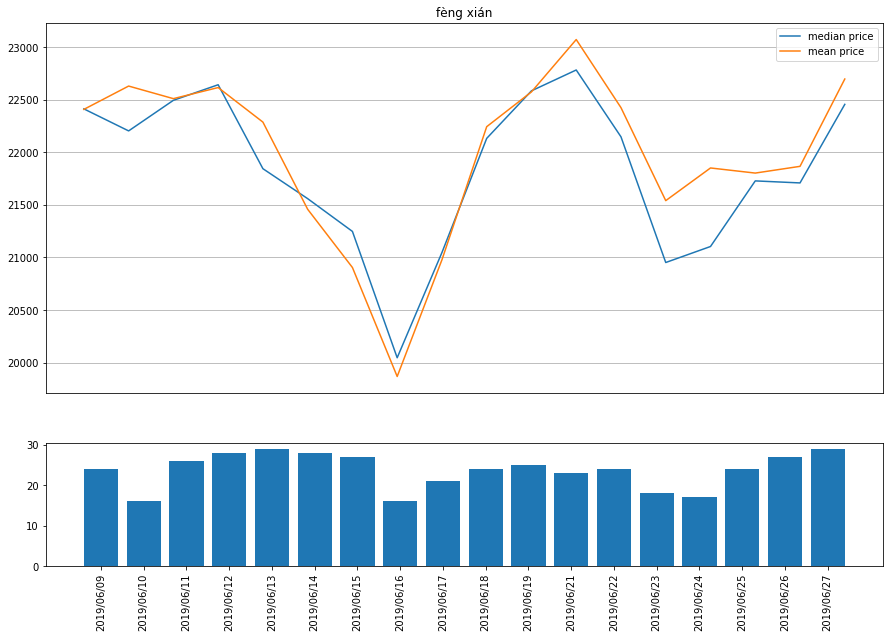

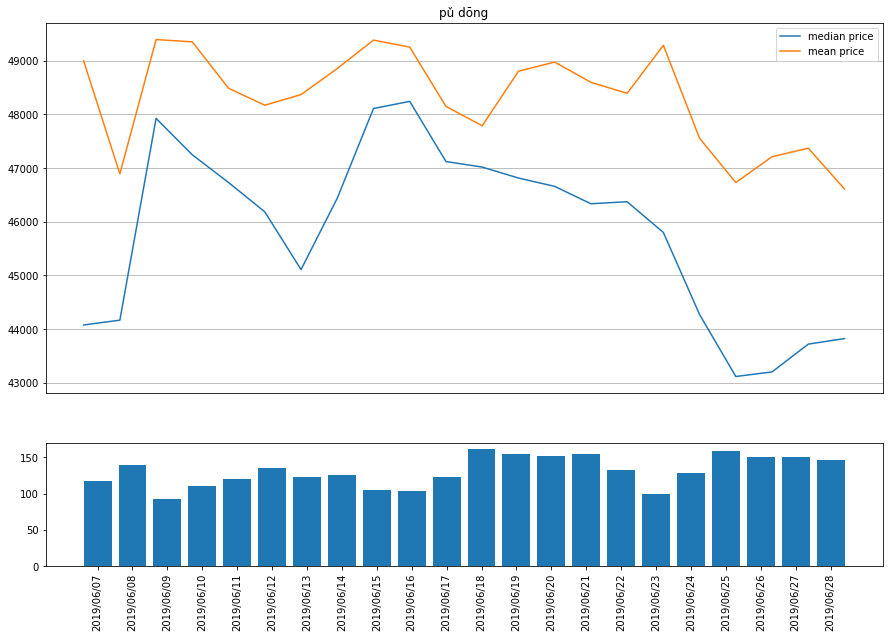

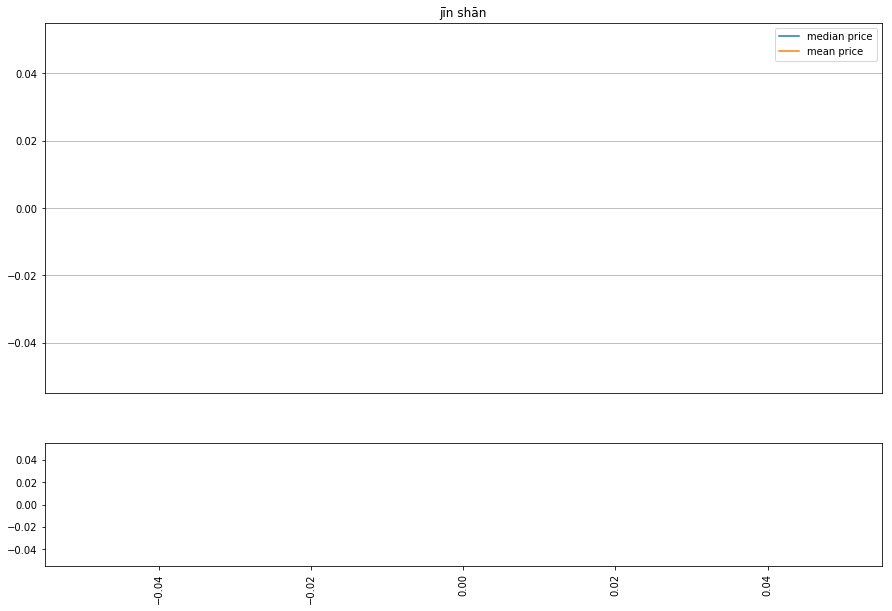

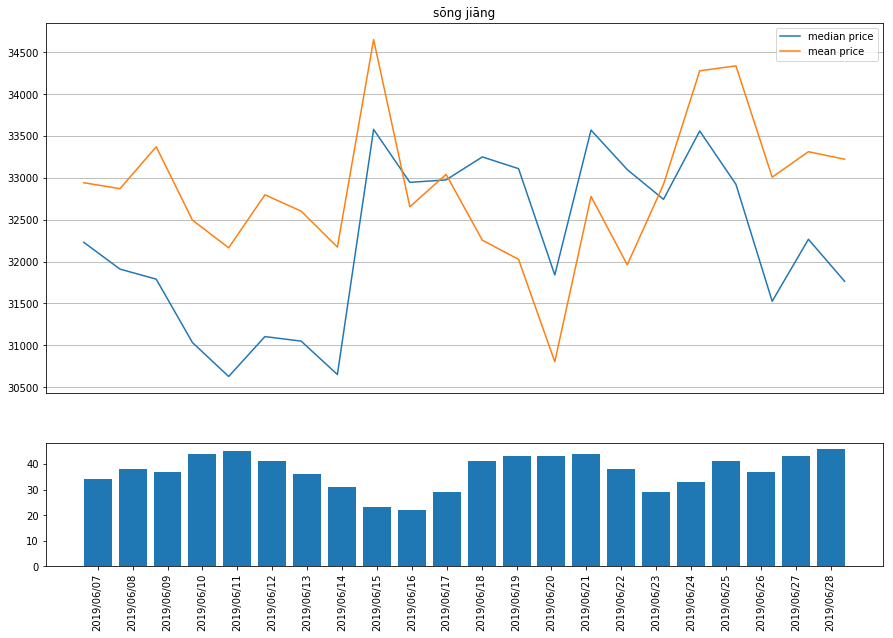

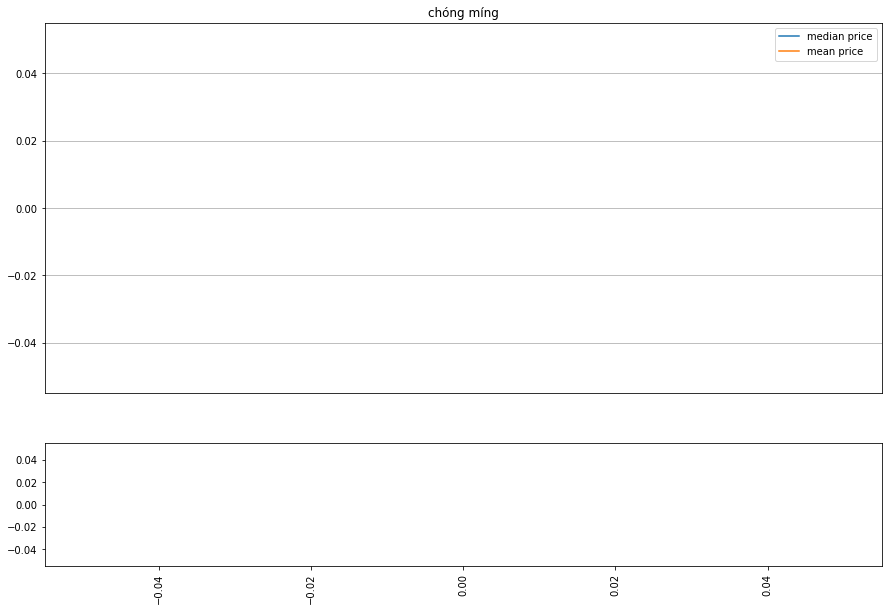

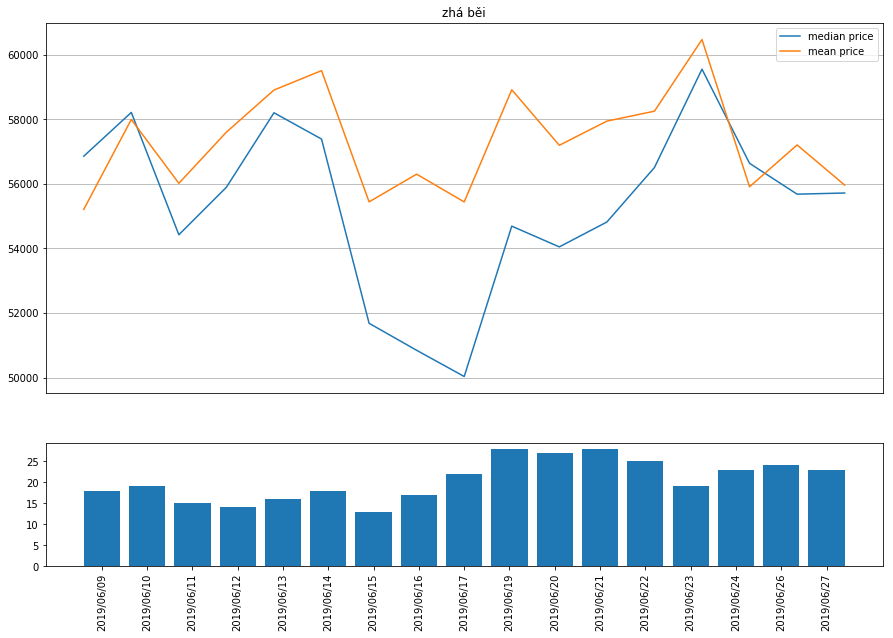

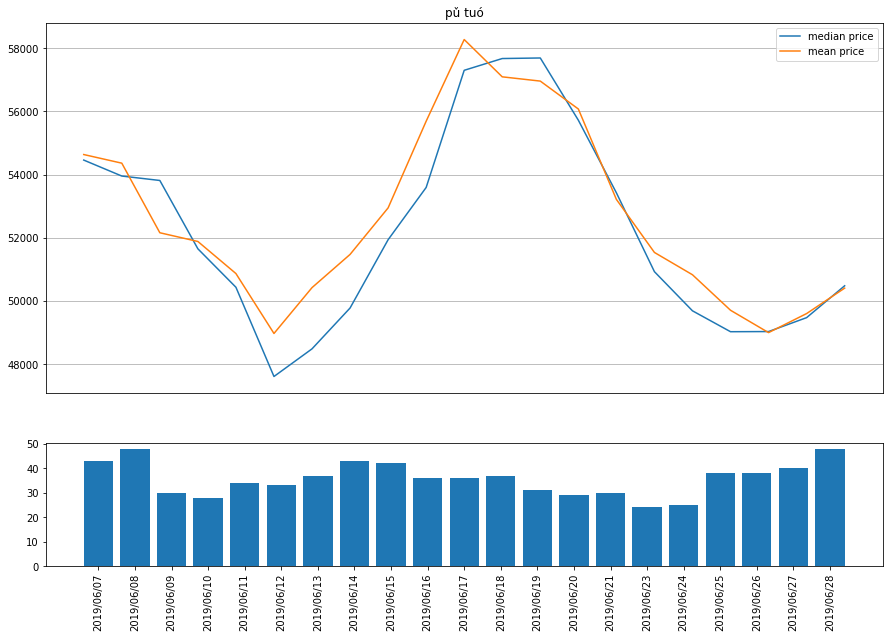

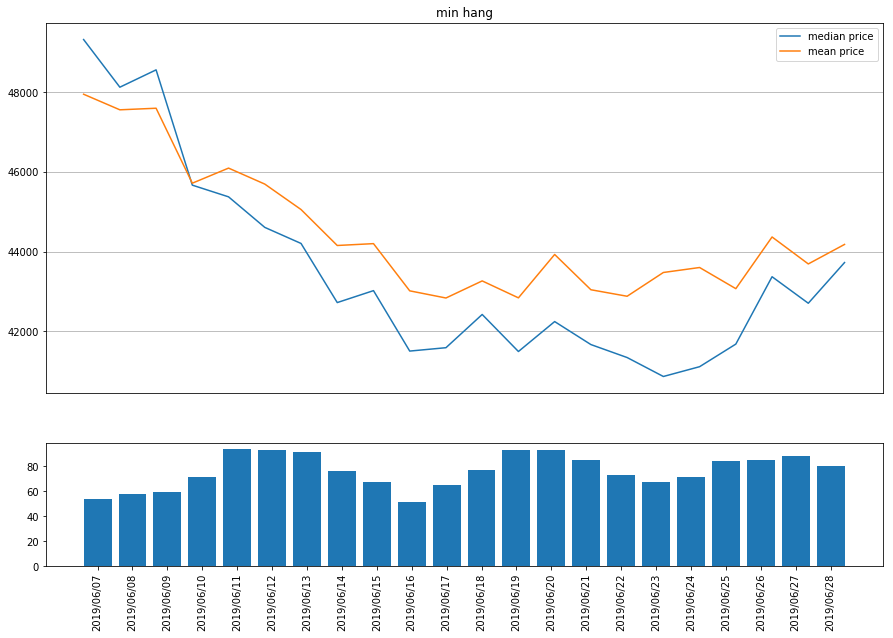

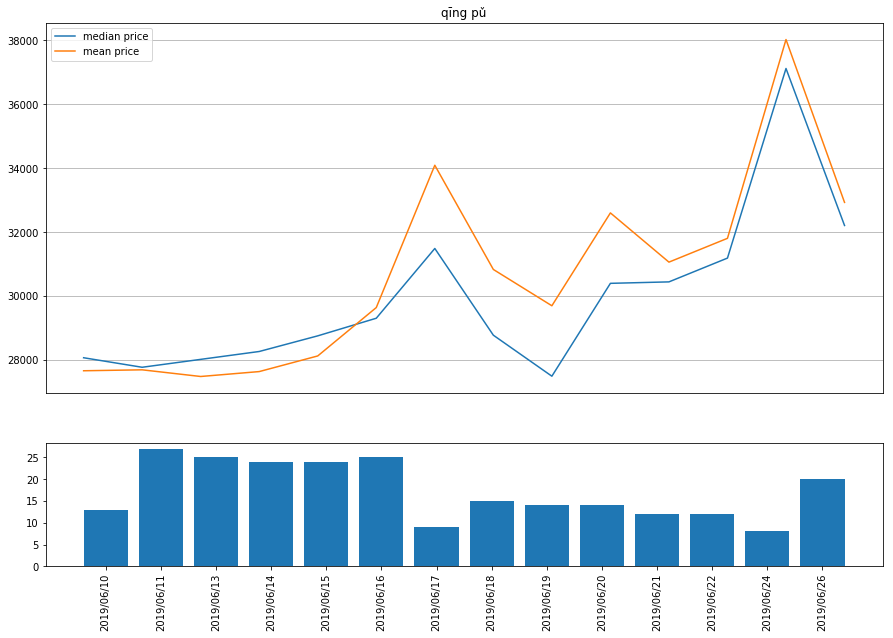

In [17]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
from pypinyin import pinyin
import numpy as np
MA = True
#MA = False
ma_length = 5
def get_moving_average(res, ma_length):
    volume_ma = []
    median_ma = []
    mean_ma = []
    for i in range(len(res) - ma_length):
        volume_ele = sum(res['volume'].iloc[i:i+ma_length])
        median_ele = 0
        mean_ele = 0
        for j in range(i, i + ma_length):
            median_ele += res['volume'].iloc[j] * res['median_price'].iloc[j]
            mean_ele += res['volume'].iloc[j] * res['mean_price'].iloc[j]
        volume_ma.append(volume_ele)    
        median_ma.append(median_ele/volume_ele)
        mean_ma.append(mean_ele/volume_ele)
    return pd.DataFrame({'volume':volume_ma, 'median_price':median_ma,  'mean_price':mean_ma}, 
                        index = res.index[ma_length:])

def plot(res, title, MA, ma_length):
    if MA == True:
        res = get_moving_average(res, ma_length)
    plt.rcParams['font.sans-serif']=['SimHei']
    matplotlib.rcParams['figure.figsize'] = [15, 10]
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    ax0 = plt.subplot(gs[0])
    ax0.plot(res['median_price'])
    ax0.plot(res['mean_price'])
    ax0.legend(['median price','mean price'])
    plt.xticks([])
    plt.title(title)
    plt.grid('on')
    ax1 = plt.subplot(gs[1])
    ax1.bar(res.index, res['volume'])
    plt.xticks(rotation=90)
    plt.show()



gp = df.groupby(['成交时间'])['成交价(元/平)']
res=pd.DataFrame({"volume":gp.size(),"median_price":gp.median(), "mean_price":gp.mean()})
res = res.iloc[:len(res)-1,:]

plot(res, city, MA, ma_length)
                        
def plot_district(district ='朝阳'):
    gp = df.loc[df['下辖区']==district].groupby(['成交时间'])
    res = pd.DataFrame({'volume':gp.size(),'mean_price':gp['成交价(元/平)'].mean(), 'median_price':gp['成交价(元/平)'].median()})
    res = res.iloc[:len(res) -1,:]
    
    title = pinyin(district)
    if district == '朝阳':
        title = 'chao yang'
    elif district == '长宁':
        title = 'chang ning'
    elif district == '闵行':
        title = 'min hang'
    else:
        title = " ".join([x[0] for x in title])
    plot(res, title, MA, ma_length)
    


districts = list(set(df['下辖区']))
for district in districts:
    plot_district(district)


In [3]:
pd.options.display.max_columns = None
#df.loc[df['小区'].str.contains('团结湖南里')]
#df.loc[df['小区'].str.contains('爱乐')].sort_values(by='成交时间', ascending=False)
df.loc[df['小区'].str.contains('平乐园')].sort_values(by='成交时间', ascending=False)

,链家编号,建筑面积,朝向,户型,成交价(元/平),城市,下辖区,商圈,小区,成交时间,关注(人),带看(次),浏览(次),成交周期(天),挂牌价格(万),售价(万),调价(次),建成时间,户型结构,套内面积,电梯,梯户比例,供暖方式,装修,楼型,楼层状态,房屋年限,房屋用途,交易权属,产权所属,土地年限,标题,来源
81,101104743036,60.47,南 北,2室1厅1卫,64660,北京,朝阳,北工大,平乐园小区,2019/06/10,2,9,42,23,407.0,391.0,1,199.0,平层,暂无数据,无,一梯三户,集中供暖,简装,板楼,中楼层/6层,满五年,普通住宅,已购公房,非共有,详见业主土地证明材料或相关政府部门登记文件,平乐园小区 2室1厅 60.47㎡,NaN
1625,101104743036,60.47,南 北,2室1厅1卫,64660,北京,朝阳,北工大,平乐园小区,2019/06/10,2,9,82,23,407.0,391.0,1,199.0,平层,暂无数据,无,一梯三户,集中供暖,简装,板楼,中楼层/6层,满五年,普通住宅,商品房,非共有,详见业主土地证明材料或相关政府部门登记文件,平乐园小区 2室1厅 60.47㎡,NaN
20,101104492398,47.51,南 北,1室1厅1卫,62724,北京,朝阳,北工大,平乐园小区,2019/06/05,56,43,1784,53,305.0,298.0,1,199.0,平层,暂无数据,无,一梯三户,集中供暖,简装,板楼,顶层/6层,满五年,普通住宅,已购公房,非共有,详见业主土地证明材料或相关政府部门登记文件,平乐园小区 1室1厅 47.51㎡,NaN
2325,101104492398,47.51,南 北,1室1厅1卫,62724,北京,朝阳,北工大,平乐园小区,2019/06/05,52,43,1817,53,305.0,298.0,1,199.0,平层,暂无数据,无,一梯三户,集中供暖,简装,板楼,顶层/6层,满五年,普通住宅,已购公房,非共有,详见业主土地证明材料或相关政府部门登记文件,平乐园小区 1室1厅 47.51㎡,NaN
314,101104641714,63.59,西南,2室1厅1卫,58657,北京,朝阳,北工大,平乐园小区,2019/05/19,40,13,922,16,385.0,373.0,0,199.0,平层,45.23㎡,有,两梯十户,集中供暖,简装,塔楼,中楼层/18层,满五年,普通住宅,已购公房,非共有,详见业主土地证明材料或相关政府部门登记文件,平乐园小区 2室1厅 63.59㎡,NaN
80,101104392145,61.59,南 北,2室1厅1卫,63322,北京,朝阳,北工大,平乐园小区,2019/05/06,13,18,266,38,400.0,390.0,1,199.0,平层,暂无数据,无,一梯三户,集中供暖,其他,板楼,中楼层/6层,未满两年,普通住宅,已购公房,非共有,详见业主土地证明材料或相关政府部门登记文件,平乐园小区 2室1厅 61.59㎡,NaN
85,101103832053,47.89,南 北,1室1厅1卫,60973,北京,朝阳,北工大,平乐园小区,2019/05/06,77,7,2435,148,295.0,292.0,1,199.0,平层,暂无数据,无,一梯两户,集中供暖,精装,板楼,低楼层/6层,满两年,普通住宅,商品房,非共有,详见业主土地证明材料或相关政府部门登记文件,平乐园小区 1室1厅 47.89㎡,NaN
1114,101104495851,62.92,东南,2室1厅1卫,63414,北京,朝阳,北工大,平乐园小区,2019/04/30,33,11,502,16,420.0,399.0,0,199.0,平层,暂无数据,有,两梯十户,集中供暖,简装,塔楼,中楼层/18层,满五年,普通住宅,商品房,非共有,详见业主土地证明材料或相关政府部门登记文件,平乐园小区 2室1厅 62.92㎡,NaN
1491,101104265415,47.78,南 北,2室1厅1卫,63834,北京,朝阳,北工大,平乐园小区,2019/04/28,17,16,759,46,318.0,305.0,1,199.0,平层,32.87㎡,无,一梯三户,集中供暖,精装,板楼,顶层/6层,满两年,普通住宅,已购公房,非共有,详见业主土地证明材料或相关政府部门登记文件,平乐园小区 2室1厅 47.78㎡,NaN
1883,101104558913,47.17,南 北,1室1厅1卫,59360,北京,朝阳,北工大,平乐园小区,2019/04/25,4,1,117,4,300.0,280.0,0,199.0,平层,暂无数据,无,一梯两户,集中供暖,简装,板楼,中楼层/6层,未满两年,普通住宅,已购公房,非共有,详见业主土地证明材料或相关政府部门登记文件,平乐园小区 1室1厅 47.17㎡,NaN
